In [3]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
dataset = pd.read_excel(
    '.\\autompg_cluster.xlsx')

In [6]:
previsores = dataset.iloc[:, 1:6].values

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(previsores)
previsores = imputer.transform(previsores)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [11]:
X = previsores

In [12]:
X

array([[ 1.07087561,  0.64833417,  0.62010716, -1.25708027, -1.58146259],
       [ 1.48120772,  1.55900723,  0.84352182, -1.43565781, -1.58146259],
       [ 1.17584429,  1.16871877,  0.53972516, -1.61423534, -1.58146259],
       ...,
       [-0.57045283, -0.54855042, -0.80903746, -1.3999423 ,  1.62356475],
       [-0.71359194, -0.67864657, -0.41894836,  1.10014317,  1.62356475],
       [-0.72313454, -0.60058888, -0.30664998,  1.38586722,  1.62356475]])

In [13]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [14]:
K = range(1,10)

In [15]:
distortions = []

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

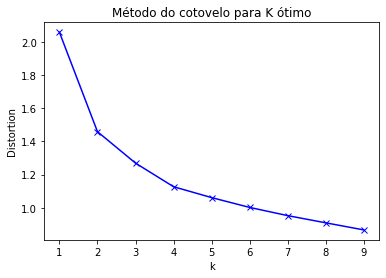

In [16]:

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Método do cotovelo para K ótimo')
plt.show()

In [17]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [18]:
n = optimal_number_of_clusters(distortions)
n

5

In [19]:
kmeans = KMeans(n_clusters=n, random_state=0)

In [20]:
kmeans.fit(previsores)

KMeans(n_clusters=5, random_state=0)

In [18]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 4,
       1, 1, 1, 1, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 1,
       2, 2, 2, 2, 4, 4, 3, 4, 2, 2, 2, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 4, 4,
       2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 1, 1, 2, 1,
       2, 2, 2, 2, 3, 3, 0, 4, 2, 2, 2, 2, 0, 4, 4, 0, 2, 1, 3, 2, 2, 1,
       1, 2, 1, 3, 0, 3, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 2, 1, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0,
       0, 2, 3, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0,

In [21]:
dataset['K-classes'] = kmeans.labels_

In [22]:
dataset

,CILINDROS,DISPLACEMENT,POTENCIA,PESO,ACELERACAO,ANO,K-classes
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
401,4,140.0,86.0,2790,15.6,82,0
402,4,97.0,52.0,2130,24.6,82,3
403,4,135.0,84.0,2295,11.6,82,0
404,4,120.0,79.0,2625,18.6,82,3


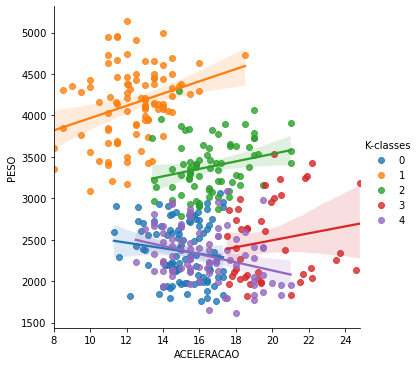

In [21]:
sb.lmplot('ACELERACAO', 'PESO',
           hue='K-classes', data=dataset)